In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
ORIG_SHAPE = (256,256)
CROP_SIZE = (128,128)
IMG_SHAPE = (64,64)

Using TensorFlow backend.


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

model = Sequential()
model.add(Conv2D(512, (3, 3), input_shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)))
model.add(Conv2D(256, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())


model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=[root_mean_squared_error])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 512)       14336     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 256)       1179904   
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 256)       1024      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       2

In [10]:
model.load_weights("model_weights_17000.h5")

In [36]:
x_t = np.load("X_T.npy")
ytrain = np.load("ytrain.npy")

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_t, ytrain, test_size=0.33, random_state=42)

C:\Users\swade\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0 0 0 0 0 0 0 1 0 0]')

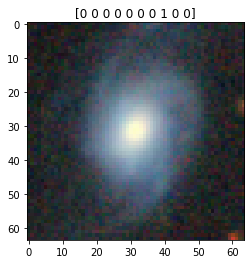

In [38]:
j=1024
plt.imshow(x_t[j])
plt.title(ytrain[j])

In [39]:
test = []
test.append(x_t[1024])
ypred = model.predict(np.array(test))

In [40]:
ypred = np.round(ypred)

In [41]:
if ypred[0][0] == 1:
    print("Disturbed Galaxies")
elif ypred[0][1] == 1:
    print("Merging Galaxies")
elif ypred[0][2] == 1:
    print("Round Smooth Galaxies")
elif ypred[0][3] == 1:
    print("In-between Round Smooth Galaxies")
elif ypred[0][4] == 1:
    print("Cigar Shaped Smooth  Galaxies")
elif ypred[0][5] == 1:
    print("Barred Spiral Galaxies")
elif ypred[0][6] == 1:
    print("Unbarred Tight Spiral Galaxies")
elif ypred[0][7] == 1:
    print("Unbarred Loose Spiral Galaxies")
elif ypred[0][8] == 1:
    print("Edge-on Galaxies without Bulge")
elif ypred[0][9] == 1:
    print("Edge-on Galaxies with Bulge")
    
print(ypred)


Unbarred Loose Spiral Galaxies
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


# Accuracy Metics

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [43]:
ypred = model.predict(X_test)

In [44]:
ypred = np.round(ypred)

In [45]:
ypred = [np.argmax(y, axis=None, out=None) for y in ypred]
y_test = [np.argmax(y, axis=None, out=None) for y in y_test]

In [46]:
ypred = np.array(ypred).reshape(1,-1)
y_test = np.array(y_test).reshape(1,-1)

In [47]:
y_test[0]

array([3, 3, 1, ..., 3, 0, 0], dtype=int64)

In [48]:
ypred

array([[3, 3, 1, ..., 3, 0, 3]], dtype=int64)

In [49]:
results = confusion_matrix(y_test[0], ypred[0])
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',round(accuracy_score(y_test[0], ypred[0]) * 100,2),'%')
print ('Classification Report : ')
print (classification_report(y_test[0], ypred[0]))

Confusion Matrix :
[[212  18  12  24  12   5  12  51   6  11]
 [ 44 552   4   3   1   0   2   3   6   6]
 [ 20  18 797   1   0   1  22   1   0   0]
 [ 37  20   2 572   5   0   4   1   0   3]
 [  9   1   0   1  88   0   0   0   3   8]
 [132  25   2   1   2 456  27  28   6   0]
 [ 64   3   9   4   3   0 448  45  10   0]
 [203  28   3   4   2   7  72 544  11   6]
 [ 11   4   0   0   1   0   0   0 439   3]
 [ 19   3   0   1   0   4   0   3  23 599]]
Accuracy Score is 80.42 %
Classification Report : 
              precision    recall  f1-score   support

           0       0.28      0.58      0.38       363
           1       0.82      0.89      0.85       621
           2       0.96      0.93      0.94       860
           3       0.94      0.89      0.91       644
           4       0.77      0.80      0.79       110
           5       0.96      0.67      0.79       679
           6       0.76      0.76      0.76       586
           7       0.80      0.62      0.70       880
           8

# Testing with custom own Images

In [50]:
from skimage.transform import resize
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

ORIG_SHAPE = (1024,1024)
CROP_SIZE = (128,128)
IMG_SHAPE = (64,64)

def get_image(x, x1,y1, shape, crop_size):
    x = np.array(x)
    #x = x[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    x = resize(x, shape)
    return x       

img = Image.open('testing.jpg')
#Reduce dimensions from 256,256 to 64,64
x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
x_t = []
x_t.append(get_image(img,x1,y1,IMG_SHAPE,CROP_SIZE))

ypred = model.predict(np.array(x_t))


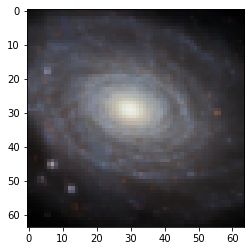

In [51]:
plt.imshow(x_t[0])

In [52]:
ypred = np.round(ypred)

In [53]:
if ypred[0][0] == 1:
    print("Disturbed Galaxies")
elif ypred[0][1] == 1:
    print("Merging Galaxies")
elif ypred[0][2] == 1:
    print("Round Smooth Galaxies")
elif ypred[0][3] == 1:
    print("In-between Round Smooth Galaxies")
elif ypred[0][4] == 1:
    print("Cigar Shaped Smooth  Galaxies")
elif ypred[0][5] == 1:
    print("Barred Spiral Galaxies")
elif ypred[0][6] == 1:
    print("Unbarred Tight Spiral Galaxies")
elif ypred[0][7] == 1:
    print("Unbarred Loose Spiral Galaxies")
elif ypred[0][8] == 1:
    print("Edge-on Galaxies without Bulge")
elif ypred[0][9] == 1:
    print("Edge-on Galaxies with Bulge")
    
print(ypred)


Unbarred Tight Spiral Galaxies
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


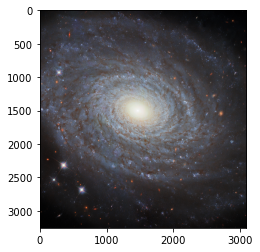

In [55]:
plt.imshow(img)